In [1]:
from model import *
%reload_ext autoreload
%autoreload 2

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
databunch = TextLMDataBunch.from_id_files('/data/char-lm-fastai/tmp',bs = 256)

In [48]:
learn = RNNLearner.language_model(databunch, emb_sz=100, nh=300, nl=1, tie_weights=False,drop_mult=0.)

In [49]:
learn.model

SequentialRNN(
  (0): RNNCore(
    (encoder): Embedding(73, 100, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(73, 100, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(100, 100)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=100, out_features=73, bias=True)
    (output_dp): RNNDropout()
  )
)

In [57]:
learn.lr_find(start_lr=1e-7, num_it=10000)

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


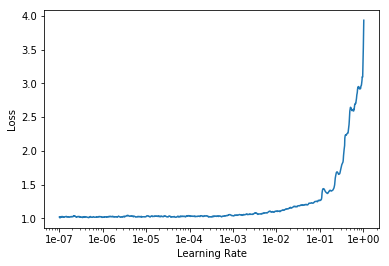

In [58]:
learn.recorder.plot()

In [59]:
learn.fit_one_cycle(5, 1e-4)

Total time: 1:30:04
epoch  train_loss  valid_loss  accuracy
1      1.033237    1.025149    0.702795  (17:59)
2      1.026049    1.025095    0.702787  (17:40)
3      1.024088    1.023615    0.703158  (17:50)
4      1.032354    1.022652    0.703448  (17:56)
5      1.027483    1.021787    0.703672  (18:37)



In [56]:
get_space_preds('tesla stock plunges after ceo statement', learn.model, learn.data.train_ds.vocab)

torch.Size([40, 2])
PREDS torch.Size([80, 73])
ARGMAX torch.Size([40, 2])
tesla stock plunges after ceo statement
ahcla iaack iranged tnter too ohare ent
ACTUAL tesla stock plu
PREDICTED ahcl@ @ iaack ira
ACTUAL esla stock plunges a
PREDICTED hcla iaac@ @ iranged t
ACTUAL ck plunges after ceo
PREDICTED ck irange@ @ tnter too
ACTUAL nges after ceo state
PREDICTED nged tnte@ @ too ohare
ACTUAL  after ceo statement
PREDICTED  tnter to@ @ ohare ent
ACTUAL  ceo statement
PREDICTED  too ohar@ @ ent


In [74]:
learn.data.train_ds.vocab.itos[7]

'o'